In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('StationDetails.csv')

In [3]:
data = data.drop(['Have Accommodation?','Stipend (PG)'], axis = 1)

In [4]:
data = data.drop(data[(data['Industry Domain'] != 'IT') &
                      (data['Industry Domain'] != 'Finance and Mgmt') &
                      (data['Industry Domain'] != 'Others')].index)

In [5]:
data['Location'].value_counts()

Bangalore         101
Mumbai             54
Gurgaon            26
Hyderabad          15
Pune               12
Chennai             7
Noida               4
New delhi           3
Kolkata             3
California          3
Delhi               2
Portland            2
New York            1
Jakarta             1
Mumbai/Pune         1
Surat               1
Dehradun            1
Gurugram            1
Secunderabad        1
New Delhi           1
Pilani              1
Texas               1
NOIDA               1
Mumbai (Worli)      1
Name: Location, dtype: int64

In [6]:
data = data.drop(data[(data['Location'] == 'Gurgaon') |
                      (data['Location'] == 'Noida')  |
                      (data['Location'] == 'NOIDA') |
                      (data['Location'] == 'Delhi') |
                      (data['Location'] == 'New Delhi') |
                      (data['Location'] == 'New delhi') |
                      (data['Location'] == 'Gurugram') |
                      (data['Location'] == 'Dehradun') |
                      (data['Location'] == 'Pilani') |
                      (data['Location'] == 'Kolkata') |
                      (data['Location'] == 'Jakarta')].index)

In [7]:
data['Location'].value_counts()

Bangalore         101
Mumbai             54
Hyderabad          15
Pune               12
Chennai             7
California          3
Portland            2
New York            1
Texas               1
Mumbai/Pune         1
Surat               1
Secunderabad        1
Mumbai (Worli)      1
Name: Location, dtype: int64

In [8]:
data = data[data['Stipend (UG)'] >= 15000]

In [9]:
data = data.sort_values('Stipend (UG)', ascending = False).reset_index()
data = data.drop('index', axis = 1)
data

,Station ID,Company Name,Location,Industry Domain,Preferred Branches,Stipend (UG),Facilities (Raw),Projects
0,6064,Yugabyte,Pune,IT,A7,125000.0,ContactDetailsForGirls: \nStartTime: 9:00AM\n...,Project: 0\nTitle: -\nDescription: Project dom...
1,6063,Yugabyte,Bangalore,IT,A7,125000.0,StipendForPG: 0\nContactDetailsForBoys: \nComp...,Project: 0\nTitle: -\nDescription: Project dom...
2,5178,Eltropy,Bangalore,IT,"A7 , AnyA7",125000.0,Stipend: 125000\nRemarkforAccommodation: \nAcc...,Project: 0\nTitle: Java/Golang backend develop...
3,3447,Goldman Sachs - Investment Banking,Bangalore,Finance and Mgmt,"AnyB3 , AnyB4",120000.0,Stipend: 120000\nFacultyId: 0\nOnOffice: -\nOt...,Project: 0\nTitle: Investment Banking Interns...
4,3258,Cohesity Storage Solutions India Pvt. Ltd.,Bangalore,IT,A7,120000.0,ContactDetailsForBoys: \nStartTime: 9:00AM\nT...,Project: 0\nTitle: Multiple projects in Softwa...
...,...,...,...,...,...,...,...,...
182,5199,"Women Development &Child Welfare Department,",Hyderabad,Others,-,15000.0,"Stationary: -\nStationAddress: H.No. 8-3-222, ...",Project: 0\nTitle: Study and analysis of Women...
183,4966,CASHe,Hyderabad,IT,"A3 , A7 , A8",15000.0,ToOffice: No Facilities\nFieldTA: Unknown\nSub...,Project: 0\nTitle: Product Management \nDescri...
184,3332,Sun Mobility,Bangalore,IT,"A7 , C6",15000.0,StipendForPG: 0\nRemarkforAccommodation: \nAcc...,Project: 0\nTitle: ERP Internship\nDescription...
185,4994,Saveo Healthtech Pvt. Ltd,Bangalore,Finance and Mgmt,Any,15000.0,Status: Active\nAccomodation: -\nToOffice: -\n...,Project: 0\nTitle: Business Intelligence Devel...


In [10]:
data['filter1'] = 0
data['Preferred Branches'] = data['Preferred Branches'] + '.'
for i, row in data.iterrows():
    if 'A3' in row['Preferred Branches']:
        data['filter1'].iloc[i] += 1
        
    if 'Any.' in row['Preferred Branches']:
        data['filter1'].iloc[i] += 1
        
    if 'Any ' in row['Preferred Branches']:
        data['filter1'].iloc[i] += 1

C:\Users\chanu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
data_A3 = data[data['filter1'] > 0]

In [12]:
data_non_A3 = data[data['filter1'] == 0]

In [13]:
data['filter2'] = 0
for i, row in data.iterrows():
    project_title = row['Projects']
    project_title = project_title.lower()
#     if 'data' in project_title:
#         data['filter2'].iloc[i] += 1
        
#     if 'python' in project_title:
#         data['filter2'].iloc[i] += 1
        
#     if 'analy' in project_title:
#         data['filter2'].iloc[i] += 1
        
    if 'data analy' in project_title:
        data['filter2'].iloc[i] += 1
        
    if 'machine learning' in project_title:
        data['filter2'].iloc[i] += 1
        
    if 'sql ' in project_title:
        data['filter2'].iloc[i] += 1
        
    if 'data science' in project_title:
        data['filter2'].iloc[i] += 1
        
    if 'neural network' in project_title:
        data['filter2'].iloc[i] += 1
        
    if 'data visualization' in project_title:
        data['filter2'].iloc[i] += 1
        
    if 'image processing' in project_title:
        data['filter2'].iloc[i] += 1
        
    if 'iot' in project_title:
        data['filter2'].iloc[i] += 1
        
#     if 'spark' in project_title:
#         data['filter2'].iloc[i] += 1
        
    if 'deep learning' in project_title:
        data['filter2'].iloc[i] += 1

C:\Users\chanu\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [14]:
data_i = data[data['filter2']  > 0]
data_i

,Station ID,Company Name,Location,Industry Domain,Preferred Branches,Stipend (UG),Facilities (Raw),Projects,filter1,filter2
5,5315,Bloomreach Technologies Pvt. Ltd,Bangalore,IT,A7.,100000.0,Stipend: 100000\nContactDetailsForBoys: \nCont...,Project: 0\nTitle: Backend Data Pipeline Engin...,0,1
8,518,Morgan Stanley Advantage Services,Mumbai,IT,Any.,100000.0,StationFacilitiesId: 9604\nFacultyId: 1057\nCo...,Project: 0\nTitle: Projects in Risk Analytics\...,1,1
10,6100,JPMC - GR&C WCS – Strategy Analytics – Data Sc...,Mumbai,Finance and Mgmt,"A3 , A7 , A8 , AA , B3 , B4 , B5.",100000.0,StipendForPG: 0\nStartTime: 9:00AM\nStatus: A...,Project: 0\nTitle: GR&C WCS – Strategy Analyti...,1,4
11,6067,CommerceIQ,Bangalore,IT,"A3 , A7 , A8 , AA.",100000.0,Travel: -\nAccomAddressforBoys: \nToOffice: -\...,Project: 0\nTitle: 1.\tProduct Similarity Scor...,1,2
12,4837,JPMS CIB R&A Data Science,Mumbai,Finance and Mgmt,A7.,100000.0,RemarkforAccommodation: \nAccomAddressforBoys:...,Project: 0\nTitle: CIB R&A Data Science\nDescr...,0,4
...,...,...,...,...,...,...,...,...,...,...
181,4965,Melio- Non Tech,Bangalore,IT,Any.,15000.0,FieldTA: -\nStationary: -\nSubsidizedLunch: -\...,Project: 0\nTitle: Competitions Management\nDe...,1,2
183,4966,CASHe,Hyderabad,IT,"A3 , A7 , A8.",15000.0,ToOffice: No Facilities\nFieldTA: Unknown\nSub...,Project: 0\nTitle: Product Management \nDescri...,1,2
184,3332,Sun Mobility,Bangalore,IT,"A7 , C6.",15000.0,StipendForPG: 0\nRemarkforAccommodation: \nAcc...,Project: 0\nTitle: ERP Internship\nDescription...,0,1
185,4994,Saveo Healthtech Pvt. Ltd,Bangalore,Finance and Mgmt,Any.,15000.0,Status: Active\nAccomodation: -\nToOffice: -\n...,Project: 0\nTitle: Business Intelligence Devel...,1,1


In [15]:
data_A3_i = data[(data['filter1'] > 0) & (data['filter2'] > 0)]
data_non_A3_i_IT = data[(data['filter1'] == 0) & (data['filter2'] > 0) & (data['Industry Domain'] == 'IT')]
data_non_A3_i_FM = data[(data['filter1'] == 0) & (data['filter2'] > 0) & (data['Industry Domain'] != 'IT')]
data_A3_non_i_IT = data[(data['filter1'] > 0) & (data['filter2'] == 0) & (data['Industry Domain'] == 'IT')]
data_A3_non_i_FM = data[(data['filter1'] > 0) & (data['filter2'] == 0) & (data['Industry Domain'] != 'IT')]
data_non_A3_non_i_IT = data[(data['filter1'] == 0) & (data['filter2'] == 0) & (data['Industry Domain'] == 'IT')]
data_non_A3_non_i_FM = data[(data['filter1'] == 0) & (data['filter2'] == 0) & (data['Industry Domain'] != 'IT')]

In [16]:
data_final = pd.concat([data_A3_i,
                        data_A3_non_i_IT,
                        data_non_A3_i_IT,
                        data_non_A3_i_FM,
                        data_non_A3_non_i_IT,
                        data_A3_non_i_FM,
                        data_non_A3_non_i_FM])
data_final

,Station ID,Company Name,Location,Industry Domain,Preferred Branches,Stipend (UG),Facilities (Raw),Projects,filter1,filter2
8,518,Morgan Stanley Advantage Services,Mumbai,IT,Any.,100000.0,StationFacilitiesId: 9604\nFacultyId: 1057\nCo...,Project: 0\nTitle: Projects in Risk Analytics\...,1,1
10,6100,JPMC - GR&C WCS – Strategy Analytics – Data Sc...,Mumbai,Finance and Mgmt,"A3 , A7 , A8 , AA , B3 , B4 , B5.",100000.0,StipendForPG: 0\nStartTime: 9:00AM\nStatus: A...,Project: 0\nTitle: GR&C WCS – Strategy Analyti...,1,4
11,6067,CommerceIQ,Bangalore,IT,"A3 , A7 , A8 , AA.",100000.0,Travel: -\nAccomAddressforBoys: \nToOffice: -\...,Project: 0\nTitle: 1.\tProduct Similarity Scor...,1,2
16,5165,JPMS CIB R&A Markets – Trading,Mumbai,Finance and Mgmt,"A3 , A7 , A8 , AA , B3 , B4.",75000.0,AccomAddressforBoys: \nAccomAddressforGirls: \...,Project: 0\nTitle: CIB R&A Markets – Trading\n...,1,1
20,6121,JPMC - GR&C CCB Risk Strategy & Execution,Mumbai,Finance and Mgmt,Any.,75000.0,ContactDetailsForBoys: \nAccomodation: -\nFiel...,Project: 0\nTitle: GR&C CCB Risk Strategy & Ex...,1,1
...,...,...,...,...,...,...,...,...,...,...
151,4900,Saras Analytics - Nontech,Hyderabad,Finance and Mgmt,"A7 , C6 , AnyA7 , AnyC6.",25000.0,ContactDetailsForGirls: \nFacultyId: 0\nStartT...,Project: 0\nTitle: Business Analyst Intern \nD...,0,0
153,6042,Arkam Ventures,Bangalore,Finance and Mgmt,B3.,25000.0,Stipend: 25000\nFacultyId: 0\nStipendForPG: 0\...,Project: 0\nTitle: Investment Analyst\nDescrip...,0,0
167,6075,HDFC ERGO General Insurance Co Ltd,Mumbai,Finance and Mgmt,"A7 , B3 , C6.",20000.0,ContactDetailsForGirls: \nAccomAddressforBoys:...,Project: 0\nTitle: Blockchain use cases for Ge...,0,0
171,6090,Melio - Tech,Bangalore,Finance and Mgmt,A7.,20000.0,FieldTA: -\nStipend: 20000\nFacultyId: 0\nAcco...,Project: 0\nTitle: App-Website Development\nDe...,0,0


In [17]:
data_final.to_csv('data_final.csv')
data_final['Company Name'].to_csv('data_final_names.csv')

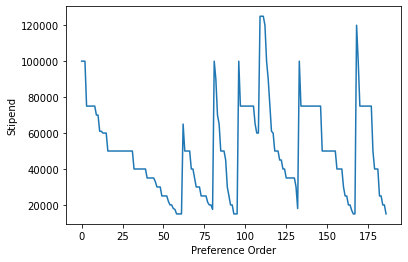

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(range(len(data_final))),data_final['Stipend (UG)'])
plt.xlabel('Preference Order')
plt.ylabel('Stipend')
plt.show()

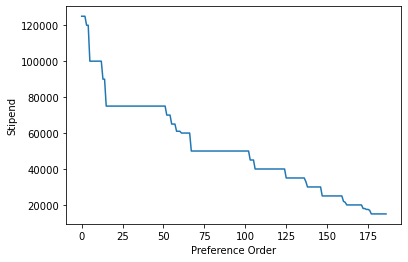

In [19]:
plt.plot(list(range(len(data))), data['Stipend (UG)'])
plt.xlabel('Preference Order')
plt.ylabel('Stipend')
plt.show()

In [20]:
data_final['Stipend (UG)'].value_counts().sort_index()

15000.0     10
17000.0      1
17500.0      2
18000.0      2
20000.0     10
21500.0      1
22000.0      1
25000.0     13
30000.0      9
33000.0      1
35000.0     12
40000.0     19
45000.0      3
50000.0     36
60000.0      6
61000.0      3
65000.0      3
70000.0      3
75000.0     37
90000.0      2
100000.0     8
120000.0     2
125000.0     3
Name: Stipend (UG), dtype: int64

In [21]:
data_final['Stipend (UG)'].describe(percentiles = [x*0.1 for x in range(11)])

count       187.000000
mean      51029.411765
std       25444.921355
min       15000.000000
0%        15000.000000
10%       20000.000000
20%       25000.000000
30%       35000.000000
40%       40000.000000
50%       50000.000000
60%       50000.000000
70%       65000.000000
80%       75000.000000
90%       75000.000000
100%     125000.000000
max      125000.000000
Name: Stipend (UG), dtype: float64

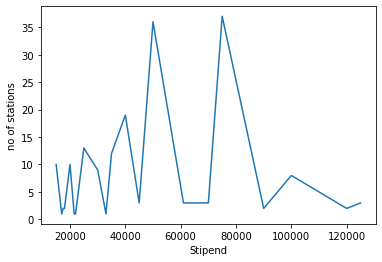

In [22]:
data_final_stipend = data_final['Stipend (UG)'].value_counts().sort_index()
plt.plot(data_final_stipend.index, data_final_stipend)
plt.ylabel('no of stations')
plt.xlabel('Stipend')
plt.show()